# Logistic Regression (Logit Regression)
    Some regression algorithms can be used for classification as well (and vice versa).
    Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class. 
    If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class, or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). 
    This makes it a binary classifier.    

## Logistic function
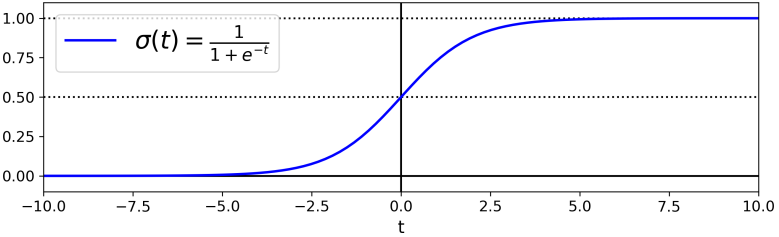

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


def sigmoid(x):
    return 1/(1+np.exp(-x))

def shuffle_dataset(x):
    return x[np.random.permutation(x.shape[0])]

def change_to_binary(x):
    return x >= 0.5

# load dataset
dataset = pd.read_csv('sample-data/binary-dataset.csv')

# shuffle dataset
x = shuffle_dataset(dataset.to_numpy())
x = dataset.to_numpy()

# split x and y
x,y = x[:,:-1], x[:, -1]

X = np.c_[np.ones((x.shape[0],1)),x]

eta=0.1
n_iteration = 50
m=X.shape[0]

theta = np.random.randn(X.shape[1],1)

for i in range(n_iteration):
    grad_vector = (1/m)*X.T@(sigmoid(X@theta).ravel() - y).reshape(m,1)
    theta = theta - eta*grad_vector

y_pred_intermediat = sigmoid(X@theta)
y_pred = change_to_binary(y_pred_intermediat)

In [2]:
print('prediction comparision:\n',np.c_[y_pred, y])

prediction comparision:
 [[1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


**Note:** 

    Just like the other linear models, Logistic Regression models can be regularized using ℓ1 or ℓ2 penalties. Scitkit-Learn actually adds an ℓ2 penalty by default.

    The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.

# Softmax Regression (Multinomial Logistic Regression)
    The Logistic Regression model can be generalized to support multiple classes directly.
    For a given an instance x, the Softmax Regression model first computes a score sk(x) for each class k, then estimates the probability of each class by applying the sofmax function (also called the normalized exponential) to the scores.

## Sofmax score for class k
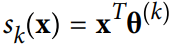

    Note that each class has its own dedicated parameter vector θ(k). All these vectors are typically stored as rows in a parameter matrix θ.
    
    Now estimatethe probability pk that the instance belongs to class k by running the scores through the softmax function.
    Computes the exponential of every score then normalizes it by dividing by sum of all the exponentials (logits/log-odds)
## Sofmax function
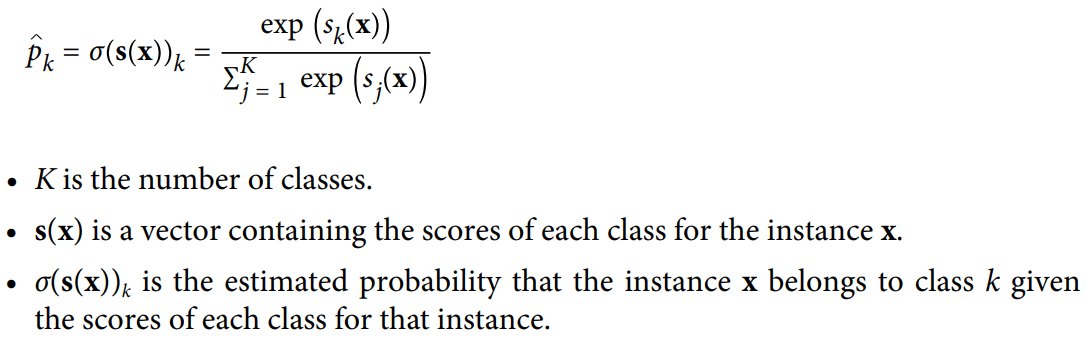
## Sofmax Regression classifier prediction
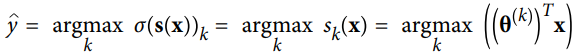
## Cross entropy cost function
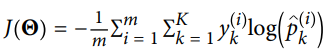
## Cross entropy gradient vector for class k
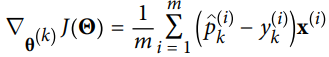

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
print(iris.keys())
print(iris['data'][0])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[5.1 3.5 1.4 0.2]


In [4]:
x, y = iris['data'], iris['target']

soft_max = LogisticRegression(multi_class='multinomial', solver='newton-cg',C=10)
soft_max.fit(x,y)

LogisticRegression(C=10, multi_class='multinomial', solver='newton-cg')

In [5]:
soft_max.predict([[5, 3, 7, 4]])

array([2])

In [6]:
soft_max.predict_proba([[2, 3, 6, 4]])

array([[3.71298752e-16, 6.42139358e-13, 1.00000000e+00]])